In [1]:
import re
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# booleans to ensure correct parsing and order of data
found_header_1 = False
found_header_2 = False
found_sec_1 = False
found_sec_2 = False
found_value = False
# alternative 1:
list_found_bools = [False, False, False, False, False, False]
# alternative 1.1:
list_found_bools = [False, False, False, False]
# alternative 2:
last_found_string = ""
# current sec
current_sec = 0

# counter for iteration
counter = 0

# find (key)words and safe to dictionary
list_of_words = ["header:", " sec:", "value", "---"]
temp_dict = {}


In [3]:
def find_word(current_line):
    for j, word in enumerate(list_of_words):
        if word in current_line:
            return j
    return -1

def check_correctness(current_word_index):
    global found_header_1, found_header_2, found_sec_1, found_sec_2, found_value, counter
    if current_word_index == 0:
        if found_header_1:
            if found_header_2 or not found_sec_1:
                return False
            else:
                found_header_2 = True
                return True
        else:
            found_header_1 = True
            return True

    if current_word_index == 1:
        if found_header_1:
            if found_sec_1:
                if found_sec_2 or not found_header_2:
                    return False
                else:
                    found_sec_2 = True
                    return True
            else:
                found_sec_1 = True
                return True
        else:
            return False
    if current_word_index == 2:
        if found_header_1 and found_header_2 and found_sec_1 and found_sec_2 and not found_value:
            found_value = True
            return True
        else:
            return False
    if current_word_index == 3:
        if found_header_1 and found_header_2 and found_sec_1 and found_sec_2 and found_value:
            found_header_1 = False
            found_header_2 = False
            found_sec_1 = False
            found_sec_2 = False
            found_value = False
            counter += 1
            return True
        else:
            return False
    return False


In [4]:
def add_value_to_dict(current_word_index, current_line):
    global temp_dict, current_sec
    # get integer from string
    temp_number = int(re.search(r'\d+', current_line).group())

    if current_word_index == 1:
        current_sec = temp_number
        if current_sec not in temp_dict:
            temp_dict[current_sec] = []  # Initialize an empty list for this key
            print(f"Initialized key {current_sec} with empty list.")
    elif current_word_index == 2:
        if current_sec in temp_dict:
            temp_dict[current_sec].append(temp_number)
            print(f"Added value {temp_number} to key {current_sec}.")
        else:
            print(f"Warning: key {current_sec} not initialized yet.")

In [5]:

with (open("data.txt", "r") as file):
    i = 0
    # read/parse each line of the file
    for line in file:
        # find keyword
        current_word_index = find_word(line)
        if current_word_index == -1:
            continue

        else:
            if check_correctness(current_word_index):
                if (current_word_index == 1 and not found_sec_2) or current_word_index == 2:
                    add_value_to_dict(current_word_index, line)
    print(temp_dict)
    for k in temp_dict:
        print("key ", k, " has length ", len(temp_dict[k]), " and mean ", np.mean(temp_dict[k]))


Initialized key 104 with empty list.
Added value 15 to key 104.
Added value 15 to key 104.
Added value 15 to key 104.
Added value 15 to key 104.
Added value 141 to key 104.
Added value 15 to key 104.
Added value 15 to key 104.
Added value 508 to key 104.
Added value 15 to key 104.
Added value 15 to key 104.
Added value 506 to key 104.
Added value 15 to key 104.
Added value 508 to key 104.
Initialized key 105 with empty list.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 141 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Added value 15 to key 105.
Add

In [6]:
#temp_dict_2 = temp_dict.copy()

In [8]:
#for k in temp_dict_2:
  #      print("key ", k, " has length ", len(temp_dict_2[k]), " and mean ", np.mean(temp_dict_2[k]))

In [9]:
temp_values = []
for k in temp_dict:
    temp_values.append(np.mean(temp_dict[k]))

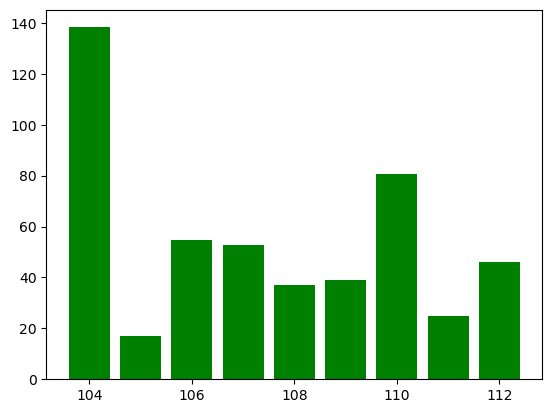

In [10]:
plt.bar(list(temp_dict.keys()), temp_values, color='g')
plt.show()

[15, 15, 15, 15, 141, 15, 15, 508, 15, 15, 506, 15, 508, 15, 15, 15, 141, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 141, 15, 15, 15, 15, 15, 15, 15, 506, 15, 15, 15, 141, 15, 141, 15, 508, 15, 15, 15, 141, 15, 15, 506, 15, 15, 506, 15, 508, 15, 141, 141, 15, 15, 506, 15, 506, 15, 15, 15, 141, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 508, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 506, 15, 15, 15, 141, 15, 15, 15, 141, 15, 15, 15, 15, 

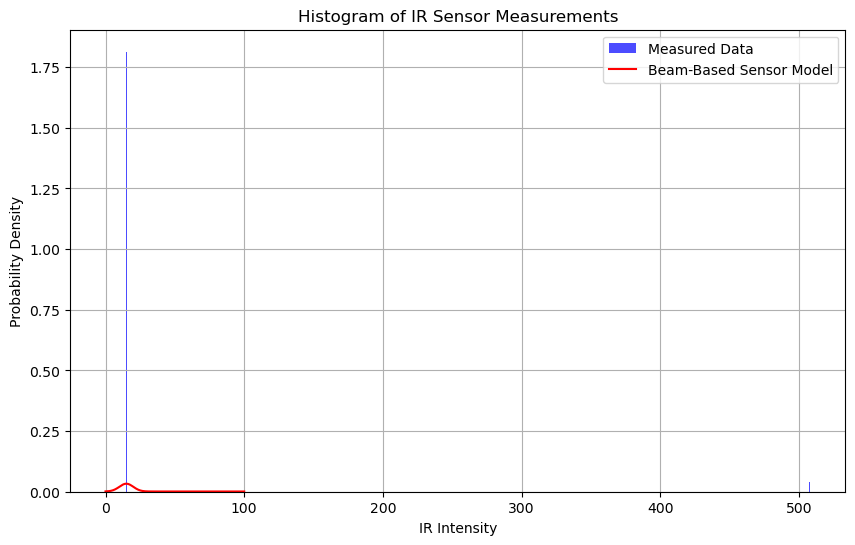

In [11]:
import matplotlib.pyplot as plt
import numpy as np

ir_values = []
for values in temp_dict.values():
    ir_values.extend(values)
for i in range(20):
    ir_values.append(20)
print(ir_values)

if len(ir_values) > 500:
    ir_values = ir_values[:500]


plt.figure(figsize=(10,6))
plt.hist(ir_values, bins=1000, density=True, alpha=0.7, color='blue', label='Measured Data')
plt.xlabel('IR Intensity')
plt.ylabel('Probability Density')
plt.title('Histogram of IR Sensor Measurements')

def beam_sensor_model(z, z_max=100, z_hit=0.8, z_rand=0.2, sigma_hit=5.0):
    # Gaussian centered around 15 (simulate wall at 15 units)
    p_hit = z_hit * (1.0 / (np.sqrt(2 * np.pi) * sigma_hit)) * np.exp(-0.5 * ((z - 15) / sigma_hit)**2)
    p_rand = z_rand * (1.0 / z_max)
    return p_hit + p_rand

z_values = np.linspace(0, 100, 200)
model_probs = [beam_sensor_model(z) for z in z_values]

model_probs = np.array(model_probs) / np.sum(model_probs)

plt.plot(z_values, model_probs, 'r-', label='Beam-Based Sensor Model')
plt.legend()
plt.grid(True)
plt.show()
